In [8]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import scipy.stats
import math

In [9]:
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning) # code sourced from: https://stackoverflow.com/questions/54197853/how-to-ignore-settingwithcopywarning-using-warnings-simplefilter
pd.options.mode.chained_assignment = None

plt.rcParams['figure.dpi'] = 300

## Testing Correlation Between Increased COVID Cases and Temperature

Correlation is tested within each County of the six selected states

In [12]:
# read in cases (county-level) dataset
us_counties = pd.read_csv('./data/us-counties.csv')
us_counties['date'] = pd.to_datetime(us_counties['date'])

In [13]:
def corr_test_df(state):
    '''
    Generate a datafram of correlations 
    bewteen case number and 3day, 5day, 10day average temperature for a state
    '''
    # list for creating df
    county_names = []
    fips_code = []
    x1_pearson_corr = []
    x1_spearman_corr = []
    x1_kendal_corr = []
    x2_pearson_corr = []
    x2_spearman_corr = []
    x2_kendal_corr = []
    x3_pearson_corr = []
    x3_spearman_corr = []
    x3_kendal_corr = []

    state_weather = pd.read_csv('./weather_data/'+str(state)+'_weather.csv', index_col=0)
    state_weather['date'] = pd.to_datetime(state_weather['date'])
    state_fips = state_weather['fips'].unique()
    
    # loop throught fips code within the state
    for fip in state_fips:
        fip_data = us_counties[us_counties['fips']==fip]
        #fip_data['cases_increase'] = fip_data['cases'].diff()
        fip_data['cases_increase_rate'] = fip_data['cases'].pct_change()
        
        fip_weather = state_weather[state_weather['fips']==fip]
        
        # average temperatures
        fip_weather['mean_temp_3D'] = fip_weather['mean_temp'].rolling(3).mean()
        fip_weather['mean_temp_5D'] = fip_weather['mean_temp'].rolling(5).mean()
        fip_weather['mean_temp_10D'] = fip_weather['mean_temp'].rolling(10).mean()
        
        full_df = pd.merge(right = fip_weather,left = fip_data, on="date")
        
        # test correlations
        x1 = pd.Series(full_df["mean_temp_3D"])
        x2 = pd.Series(full_df['mean_temp_5D'])
        x3 = pd.Series(full_df['mean_temp_10D'])
        y = pd.Series(full_df['cases_increase_rate'])
        
        county_names.append(fip_data["county"].iloc[1])
        fips_code.append(fip)
        
        # three types of correlation coefficient calculated here: Pearson, Spearman, and Kendal
        x1_pearson_corr.append(x1.corr(y))
        x1_spearman_corr.append(x1.corr(y, method='spearman'))
        x1_kendal_corr.append(x1.corr(y, method='kendall'))
        
        x2_pearson_corr.append(x2.corr(y))
        x2_spearman_corr.append(x2.corr(y, method='spearman'))
        x2_kendal_corr.append(x2.corr(y, method='kendall'))
        
        x3_pearson_corr.append(x3.corr(y))
        x3_spearman_corr.append(x3.corr(y, method='spearman'))
        x3_kendal_corr.append(x3.corr(y, method='kendall'))
    
    # create and return df
    df = pd.DataFrame(list(zip(county_names, fips_code, x1_pearson_corr, x1_spearman_corr, x1_kendal_corr,
                          x2_pearson_corr, x2_spearman_corr, x2_kendal_corr,
                          x3_pearson_corr, x3_spearman_corr, x3_kendal_corr)),
                 columns =['county', 'fips', '3D_pearson_corr', '3D_spearman_corr','3D_kendal_corr',
                          '5D_pearson_corr', '5D_spearman_corr', '5D_kendal_corr',
                          '10D_pearson_corr', '10D_spearman_corr', '10D_kendal_corr'])
    print("length of correlation df generated is:", len(df))
    return df

In [14]:
california_corr = corr_test_df("California")

length of correlation df generated is: 49


In [15]:
california_corr.head(10)

,county,fips,3D_pearson_corr,3D_spearman_corr,3D_kendal_corr,5D_pearson_corr,5D_spearman_corr,5D_kendal_corr,10D_pearson_corr,10D_spearman_corr,10D_kendal_corr
0,Orange,6059.0,-0.174577,-0.030229,-0.037009,-0.165963,-0.029750,-0.040426,-0.171232,-0.065063,-0.068245
1,Los Angeles,6037.0,0.066088,0.008992,0.005570,0.019398,-0.051436,-0.051123,0.132454,0.152045,0.073627
2,Santa Clara,6085.0,-0.160889,-0.049968,-0.031793,-0.160569,-0.048632,-0.030446,-0.171114,-0.056119,-0.040904
3,San Diego,6073.0,-0.111225,-0.336443,-0.235044,-0.079625,-0.346029,-0.242113,-0.032880,-0.307323,-0.224022
4,Humboldt,6023.0,-0.125005,-0.140204,-0.103351,-0.105434,-0.117224,-0.087454,-0.135501,-0.095807,-0.071179
5,Sacramento,6067.0,-0.064802,0.167195,0.115902,-0.067813,0.170725,0.117582,-0.073516,0.173139,0.118033
6,Marin,6041.0,-0.129742,-0.003502,-0.000380,-0.144876,-0.019051,-0.011201,-0.107564,-0.053990,-0.032158
7,Sonoma,6097.0,-0.104698,0.130622,0.086885,-0.104002,0.128037,0.085780,-0.119565,0.103628,0.063971
8,Alameda,6001.0,-0.108637,-0.057597,-0.052943,-0.102334,-0.081725,-0.069286,-0.093345,-0.113527,-0.096395
9,Placer,6061.0,-0.042793,0.009681,0.010724,-0.055419,-0.008423,-0.002866,-0.076362,-0.045406,-0.031247


In [16]:
florida_corr = corr_test_df("Florida")

length of correlation df generated is: 20


In [17]:
ny_corr = corr_test_df("New York")

length of correlation df generated is: 12


In [18]:
north_dakota_corr = corr_test_df("North Dakota")

length of correlation df generated is: 14


In [19]:
rhode_island_corr = corr_test_df("Rhode Island")

length of correlation df generated is: 1


In [20]:
texas_corr = corr_test_df("Texas")

length of correlation df generated is: 60


### Example scatterplot graphs:

In [21]:
%matplotlib inline

In [71]:
def read_weather_data(state):
    '''
    Read weather dataset according to state input from previously collected weather data
    '''
    weather_data = pd.read_csv('./weather_data/'+str(state)+'_weather.csv', index_col=0)
    weather_data['date'] = pd.to_datetime(weather_data['date'])
    return weather_data

In [85]:
def regress_case_temp(fips_code, available_weather, plot=False, temp_avg=5):
    '''
    Run regressions on case increase/spreading rate vs. average temperature of 3/5/10 days
    Print out the three regression lines
    Set plot=true would also plot a scatter plot of average temperature vs. increase rate
    the plot's x-axis is determined by the temp_avg input, the input indicates x days average (default is 5 days)
    '''
    # preprocessing case number data according to fips code
    a_data = us_counties[us_counties['fips']==fips_code]
    a_data = a_data.reset_index()
    
    a_data['cases_increase_rate'] = a_data['cases'].pct_change()
    # print(sum(a_data['cases_increase_rate'] < 0))
    # rates are logged to run regressions
    # many have 0 and negative rates so get rid of them/add minimal number 
    a_data = a_data[a_data['cases_increase_rate'] >= 0]
    a_data['increase_rate_log'] = a_data['cases_increase_rate']+0.00001
    a_data['increase_rate_log'] = [math.log(num) for num in a_data['increase_rate_log']]
    
    # preprocessing weather data
    a_weather = available_weather[available_weather['fips']==fips_code]
    a_weather['mean_temp_3D'] = a_weather['mean_temp'].rolling(3).mean()
    a_weather['mean_temp_5D'] = a_weather['mean_temp'].rolling(5).mean()
    a_weather['mean_temp_10D'] = a_weather['mean_temp'].rolling(10).mean()
    # merge two datasets
    combined_df = pd.merge(right = a_weather,left = a_data, on="date")
    
    # pullout Xs and y into numpy arrays for regression
    x1 = combined_df["mean_temp_3D"].values
    x2 = combined_df['mean_temp_5D'].values
    x3 = combined_df['mean_temp_10D'].values
    y = combined_df['increase_rate_log'].values
    combined_df['increase_rate_log'][0] = 0.00001
    
    # regressions
    # following code on regression and plotting are partially sourced from https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide-2.php
    slope1, intercept1, r1, p1, stderr1 = scipy.stats.linregress(x1, y)
    line1 = f'Regression line 3d: y={intercept1:.4f}+{slope1:.4f}x, r={r1:.4f}'
    slope2, intercept2, r2, p2, stderr2 = scipy.stats.linregress(x2, y)
    line2 = f'Regression line 5d: y={intercept2:.4f}+{slope2:.4f}x, r={r1:.4f}'
    slope3, intercept3, r3, p3, stderr3 = scipy.stats.linregress(x3, y)
    line3 = f'Regression line 10d: y={intercept3:.4f}+{slope3:.4f}x, r={r3:.4f}'
    print(line1)
    print(line2)
    print(line3)
    
    # plot
    if plot:
        fig, ax1 = plt.subplots()
        if temp_avg==3:
            ax1.plot(x1, y, linewidth=0, marker='o', label='Data points', alpha=0.65, markersize=5)
        if temp_avg==5:
            ax1.plot(x2, y, linewidth=0, marker='o', label='Data points', alpha=0.65, markersize=5)
        if temp_avg==10:
            ax1.plot(x3, y, linewidth=0, marker='o', label='Data points', alpha=0.65, markersize=5)
        ax1.plot(x1, intercept1 + slope1 * x1, label=line1)
        ax1.set_xlabel('Mean Temperature in '+str(temp_avg)+' Days (°F)')
        ax1.set_ylabel('Case Increase Rate')
        fig.legend(loc='upper right', bbox_to_anchor=(0.85, -0.005))

Regression line 3d: y=-3.9273+-0.0120x, r=-0.1504
Regression line 5d: y=-3.9047+-0.0125x, r=-0.1504
Regression line 10d: y=-3.8133+-0.0144x, r=-0.1718


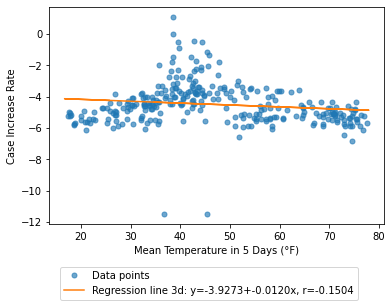

In [86]:
# new york's max 3D perason correlation county plot
ny_weather_dat = read_weather_data("New York")
ny_max_corr_fip = ny_corr.loc[ny_corr["3D_pearson_corr"].idxmax()]["fips"]
regress_case_temp(ny_max_corr_fip, ny_weather_dat, plot=True, temp_avg=5)

Regression line 3d: y=-20.6583+0.3197x, r=0.4465
Regression line 5d: y=-19.2188+0.2823x, r=0.4465
Regression line 10d: y=-15.1822+0.1805x, r=0.2681


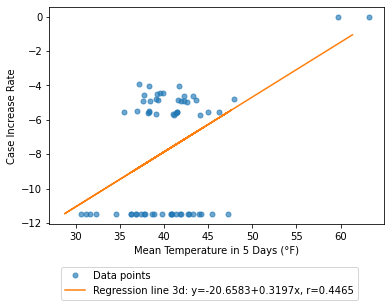

In [88]:
# california's max 3D perason correlation county plot
cali_weather_dat = read_weather_data("California")
cali_max_corr_fip = california_corr.loc[california_corr["3D_pearson_corr"].idxmax()]["fips"]
regress_case_temp(cali_max_corr_fip, cali_weather_dat, plot=True, temp_avg=5)

In [34]:
# california's min 3D perason correlation county plot
california_corr.loc[california_corr["3D_pearson_corr"].idxmin()]

county                   Kern
fips                     6029
3D_pearson_corr     -0.417586
3D_spearman_corr    -0.409617
3D_kendal_corr      -0.293261
5D_pearson_corr      -0.42495
5D_spearman_corr    -0.425994
5D_kendal_corr       -0.30962
10D_pearson_corr    -0.426018
10D_spearman_corr   -0.427641
10D_kendal_corr     -0.326769
Name: 25, dtype: object

Regression line 3d: y=-1.6798+-0.0280x, r=-0.2178
Regression line 5d: y=-1.6963+-0.0279x, r=-0.2178
Regression line 10d: y=-1.7782+-0.0269x, r=-0.2051


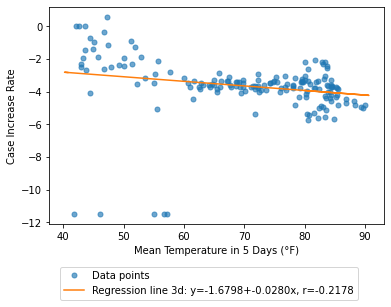

In [89]:
cali_min_corr_fip = california_corr.loc[california_corr["3D_pearson_corr"].idxmin()]["fips"]
regress_case_temp(cali_min_corr_fip, cali_weather_dat, plot=True, temp_avg=5)

In [36]:
# positive regression line, min absolute correlation
#min_corr_fip = california_corr.iloc[(california_corr["3D_pearson_corr"]-0).abs().argsort()[:1]]
#min_corr_fip = min_corr_fip['fips'].tolist()

Regression line 3d: y=-8.5501+-0.0185x, r=-0.0833
Regression line 5d: y=-8.3927+-0.0215x, r=-0.0833
Regression line 10d: y=-8.3218+-0.0228x, r=-0.0985


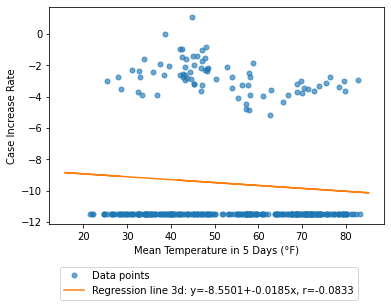

In [91]:
# rhode island's county plot (this state has onely one fips code / one county)
ri_weather_dat = read_weather_data("Rhode Island")
ri_available_weather = ri_weather_dat['fips'].unique()
ri_fips = ri_available_weather[0]
regress_case_temp(ri_fips, ri_weather_dat, plot=True, temp_avg=5)

## Clustering on Three Pearson Correlations

In [45]:
from sklearn.cluster import KMeans

In [46]:
# zip three features into a list
threeday=california_corr['3D_pearson_corr']
fiveday=california_corr['5D_pearson_corr']
tenday=california_corr['10D_pearson_corr']
corr_list=list(zip(list(threeday),list(fiveday),list(tenday)))

In [47]:
# test different cluster numbers to find elbow number
Ks=[2,3,4,5,6,7,8]
SSEs=[]
for K in Ks:
    km=KMeans(n_clusters=K)
    km.fit(corr_list)
    SSEs.append(km.inertia_)

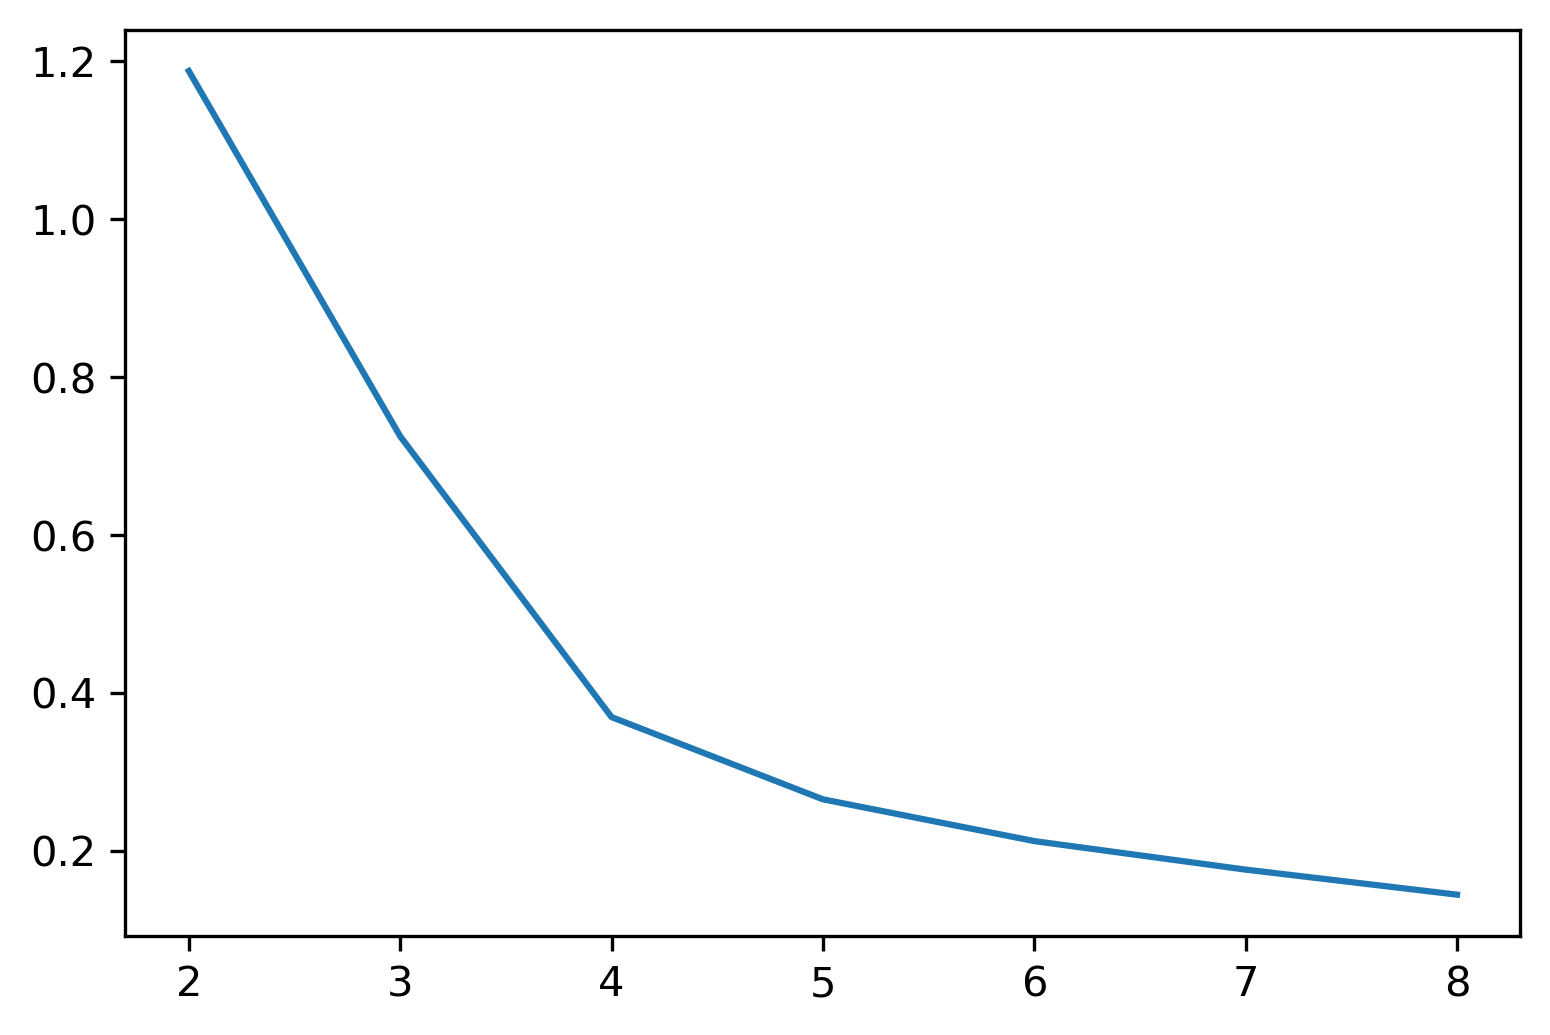

In [50]:
plt.plot(Ks,SSEs)
print(f'Elbow cluster number is 4!')

In [60]:
def plot_3d_cluster(cluster_n, state):
    '''
    Cluster the correlation data according to state into n clusters
    Plot the resulted clusters
    Note: uncomment %matplotlib widget for 3D display
    '''
    #%matplotlib widget
    %matplotlib inline
    colors = ['#DF2020', '#81DF20', '#2095DF', '#FFA500']
    kmeans = KMeans(n_clusters=cluster_n, random_state=0)
    
    if state=="California":
        df_corr = california_corr
    if state=="Florida":
        df_corr = florida_corr
    if state=="Rhode Island":
        df_corr = rhode_island_corr
    if state=="New York":
        df_corr = ny_corr
    if state=="North Dakota":
        df_corr = north_dakota_corr
    if state=="Texas":
        df_corr==texas_corr
    
    df_corr['cluster'] = kmeans.fit_predict(df_corr[['3D_pearson_corr','5D_pearson_corr','10D_pearson_corr']])
    df_corr['c'] = df_corr.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})
    fig = plt.figure(figsize=(26,6))
    ax = fig.add_subplot(131, projection='3d')
    ax.scatter(df_corr['3D_pearson_corr'],df_corr['5D_pearson_corr'],df_corr['10D_pearson_corr'], c=california_corr.c, s=15)
    ax.set_xlabel('3D_pearson_corr')
    ax.set_ylabel('5D_pearson_corr')
    ax.set_zlabel('10D_pearson_corr')
    plt.show()

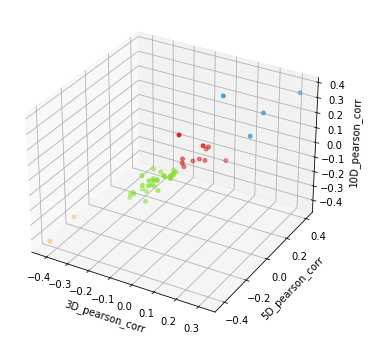

In [61]:
# plot on Caliornia's counties
plot_3d_cluster(4,"California")